In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [8]:
eps = stats.norm(scale=0.2)
x = np.linspace(0, 10, 500)
y = 0.5*x + 1 + eps.rvs(500)

mean_absolute_error k = 0.500411131896, b = 1.00120691031
mean_squared_error k = 0.50286587296, b = 0.997305549308


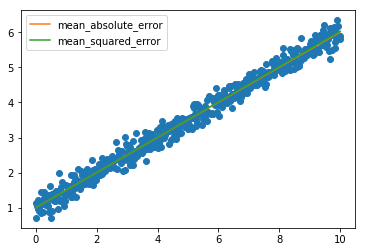

In [9]:
from scipy.optimize import minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error
def guess(param):
    global x, y
    k, b = param
    return x*k + b
def regress_and_plot():
    plt.plot(x, y, "o")
    for metric in [mean_absolute_error, mean_squared_error]:
        param = minimize(lambda param: metric(y, guess(param)), (0, 0)).x
        print metric.func_name, "k = {}, b = {}".format(*param)
        plt.plot(x, guess(param), label=metric.func_name)
    plt.legend()
regress_and_plot()

In [10]:
x2 = np.linspace(0, 10, 75)
y2 = -1 + eps.rvs(75)
x = np.concatenate([x, x2])
y = np.concatenate([y, y2])

mean_absolute_error k = 0.50091129895, b = 0.969464029864
mean_squared_error k = 0.434787454828, b = 0.757962198455


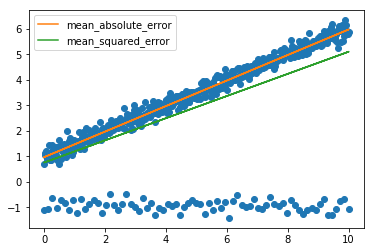

In [11]:
regress_and_plot()

Можно сделать вывод, что модель, использующая MAE более устойчива к выбросам.